# 加载sklearn自带的数据集

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
#load_iris() is a function in sklearn.datasets : Load and return the iris dataset (classification)
iris = load_iris()

# 查看数据集描述
print("数据集描述：")
print(iris.DESCR)

# 将数据转换为DataFrame格式以便于查看
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris.target)
print(iris.target_names)
iris_df['target'] = iris.target #标签值作为新的一列
"""
This is a list comprehension. For each integer label i in iris.target, it gets the corresponding class name from iris.target_names.
If iris.target is [0, 1, 2, 0], then this becomes ['setosa', 'versicolor', 'virginica', 'setosa'].
"""
# iris.target:An array of integers representing the class label for each sample (e.g., [0, 1, 2, 0, ...]).
# iris.target_names:An array of strings representing the names of the classes (e.g., ['setosa', 'versicolor', 'virginica']).
# since iris.target(integer) and iris.target_names(array of strings) are both arrays, so we can get the target_names by the index of iris.target
iris_df['target_names'] = [iris.target_names[i] for i in iris.target]


# 数据集基本信息
print("\n数据集基本信息：")
# row numbers stand for sample numbers, column numbers stand for feature numbers
print(f"样本数量: {len(iris_df)}")
print(f"特征数量: {iris.feature_names}")
print(f"目标类别: {list(iris.target_names)}")

#打印target
print(f"target: {iris.target}")
# 显示数据集的前几行
print("\n数据集：")
iris_df


数据集描述：
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 class

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


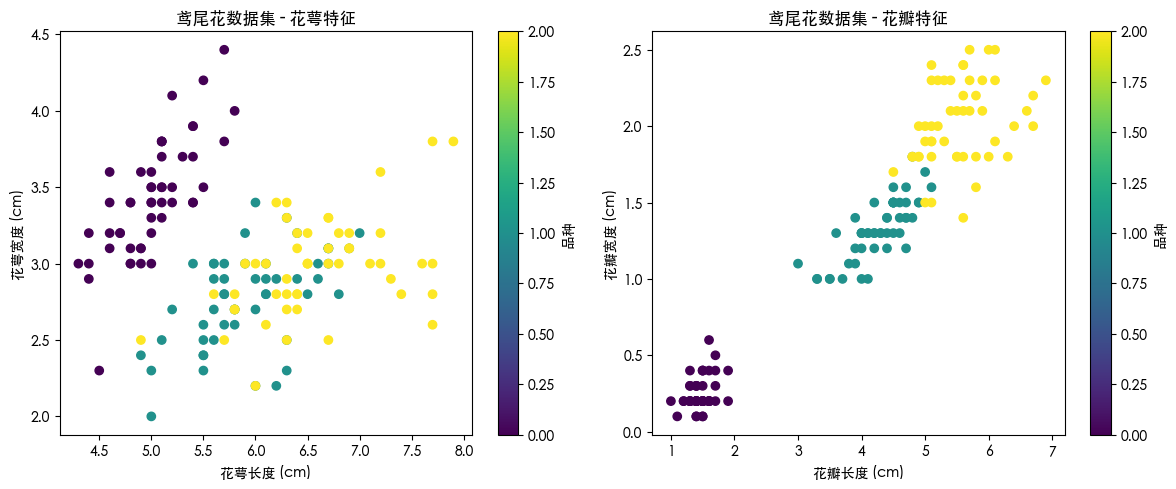

In [4]:
# 绘制散点图可视化数据
# 设置中文字体显示
import matplotlib.font_manager as font_manager
font_path = '/System/Library/Fonts/STHeiti Light.ttc'
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# C : Color of the points (name, hex, or list); cmap:Colormap if c is an array (for coloring by value)
# cmap='viridis':Uses a color gradient to map values of target to different colors.
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'], cmap='viridis')
plt.xlabel('花萼长度 (cm)')
plt.ylabel('花萼宽度 (cm)')
plt.title('鸢尾花数据集 - 花萼特征')
#Adds a color bar (legend for color meaning) to the right side of your plot.
plt.colorbar(label='品种')

plt.subplot(1, 2, 2)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'],c=iris_df['target'], cmap='viridis'
            )
plt.xlabel('花瓣长度 (cm)')
plt.ylabel('花瓣宽度 (cm)')
plt.title('鸢尾花数据集 - 花瓣特征')
plt.colorbar(label='品种')

"""
plt.tight_layout() is a Matplotlib function that automatically adjusts subplot parameters to make sure that:
Labels, titles, axis ticks, and legends
do not overlap with each other or go outside the figure.
"""
plt.tight_layout()
plt.show()

In [5]:
# 加载20类新闻数据集
from sklearn.datasets import fetch_20newsgroups

# 设置数据存储路径
data_home = './data'

# 加载20类新闻数据集，random_state=42，表示随机种子，保证每次运行结果相同,可以随意设置
"""
1.data_home : str or path-like, default=None Specify a download and cache folder for the datasets. If None, all scikit-learn data is stored in '~/ scikit_learn_data' subfolders. 
2.subset : {'train', 'test', 'all'}, default='train' Select the dataset to load: 'train' for the training set, 'test' for the test set, 'all' for both, with shuffled ordering.  categories : array-like, dtype=str, default=None If None (default), load all the categories. If not None, list of category names to load (other categories ignored). 
3.shuffle : bool, default=True Whether or not to shuffle the data: might be important for models that make the assumption that the samples are independent and identically distributed (i. i. d.), such as stochastic gradient descent.  
4.random_state : int, RandomState instance or None, default=42.Determines random number generation for dataset shuffling. Pass an int for reproducible output across multiple function calls. See :term:`Glossary <random_state>`."""

newsgroups = fetch_20newsgroups(data_home=data_home, subset='all', shuffle=True, random_state=42)

# 显示数据集基本信息
print("\n20类新闻数据集基本信息：")
print(f"样本数量: {len(newsgroups.data)}")
print(f"目标类别数量: {len(newsgroups.target_names)}")
print(f"目标类别: {newsgroups.target_names}")

# 显示前5个样本的类别
print (newsgroups.target)
print (newsgroups.target_names)
print("\n前5个样本的类别:")
for i in range(5):
    print(f"样本 {i+1}: 类别 {newsgroups.target[i]} - {newsgroups.target_names[newsgroups.target[i]]}")

#打印targert的最大值和最小值
print(f"target的最大值: {newsgroups.target.max()}")
print(f"target的最小值: {newsgroups.target.min()}")

# 显示第一个样本的内容
print("\n第一个样本的内容:")
print(newsgroups.data[0][:500] + "...")  # 只显示前500个字符

#显示第二个样本的内容
print("\n第二个样本的内容:")
print(newsgroups.data[1][:500] + "...")


20类新闻数据集基本信息：
样本数量: 18846
目标类别数量: 20
目标类别: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
[10  3 17 ...  3  1  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

前5个样本的类别:
样本 1: 类别 10 - rec.sport.hockey
样本 2: 类别 3 - comp.sys.ibm.pc.hardware
样本 3: 类别 17 - talk.politics.mideast
样本 4: 类别 3 - comp.sys.ibm.pc

In [6]:
# 加载加利福尼亚房价数据集
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 加载数据集
california = fetch_california_housing()

# 创建DataFrame以便更好地查看数据
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['target'] = california.target

# 显示数据集基本信息
print("加利福尼亚房价数据集基本信息：")
print(f"样本数量: {california.data.shape[0]}")
print(f"特征数量: {california.data.shape[1]}")
print(f"特征名称: {california.feature_names}")
#查看描述
print(california.DESCR)
# 显示数据集的前几行
print("\n数据集的前5行:")
california_df.head()


加利福尼亚房价数据集基本信息：
样本数量: 20640
特征数量: 8
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California d

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 划分训练集和测试集

In [7]:
# 从sklearn中导入数据集划分工具和鸢尾花数据集
from sklearn.model_selection import train_test_split  # 导入train_test_split函数用于划分数据集
from sklearn.datasets import load_iris  # 导入load_iris函数用于加载鸢尾花数据集

# 加载鸢尾花数据集
iris = load_iris()  # 调用load_iris函数加载鸢尾花数据集
X = iris.data  # 获取特征矩阵
y = iris.target  # 获取目标变量（标签）
print(y)

# 划分训练集和测试集，测试集占20%，stratify=y，表示按照y的类别比例划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(  # 使用train_test_split函数划分数据集
    # stratify means keep the correspoinding proportion of samples in each class;If not None, data is split in a stratified fashion, using this as the class labels.
    X, y, test_size=0.2, random_state=42, stratify=y  # 设置测试集比例为20%，固定随机种子为42，保持类别比例
)

print(iris.target_names)
print(y_train)
# 打印数据集划分结果
print("鸢尾花数据集划分结果：")  # 打印标题
print(f"训练集样本数量: {X_train.shape[0]}")  # 打印训练集样本数量
print(f"测试集样本数量: {X_test.shape[0]}")  # 打印测试集样本数量
print(f"特征数量: {X_train.shape[1]}")  # 打印特征数量
print(f"训练集中各类别样本数量:")  # 打印训练集类别分布标题
"""
Question: why np.sum(y_train == i) works?

Actually there is a trick that since y_train only have three values: 0,1,2 , which equals incidentally the all indexes in for loop of iris.target_names. since y_train is an array made up of 0,1,2 ,so  y_train == i actually checked out whether y_train equals 0,1,2 and if so , how many equal items during the 3 iteration of for loop( since iris.target_names only have three categories). so we can get the count of 0, 1,and 2 label (category) of y_train respectively.
"""
for i, name in enumerate(iris.target_names):  # 遍历每个类别
    # get the count of each label(category) in y_train
    print(f"  {name}: {np.sum(y_train == i)}")  # 打印每个类别在训练集中的样本数量
print(f"测试集中各类别样本数量:")  # 打印测试集类别分布标题
   
for i, name in enumerate(iris.target_names):  # 遍历每个类别
     # get the count of each label(category) in y_test
    print(f"  {name}: {np.sum(y_test == i)}")  # 打印每个类别在测试集中的样本数量
    
    # so, now we've know the distribution of samples in each class in both training set and test set.  


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
[0 2 1 0 1 2 1 2 2 2 2 1 1 1 1 0 0 2 2 0 1 0 2 0 1 2 2 0 2 0 0 1 1 0 2 2 1
 1 2 1 0 1 0 2 0 0 2 0 0 0 0 1 2 1 0 2 1 2 0 2 0 1 2 0 1 1 2 1 1 2 0 0 0 2
 1 2 1 2 2 1 0 2 1 0 2 0 2 1 1 0 1 2 0 0 2 2 2 1 2 0 2 1 2 2 0 1 1 1 1 1 0
 2 1 1 0 0 0 0 1 0]
鸢尾花数据集划分结果：
训练集样本数量: 120
测试集样本数量: 30
特征数量: 4
训练集中各类别样本数量:
  setosa: 40
  versicolor: 40
  virginica: 40
测试集中各类别样本数量:
  setosa: 10
  versicolor: 10
  virginica: 10


# KNN实战

In [8]:
print("读取Facebook位置数据集...")
fb_train = pd.read_csv('data/FBlocation/train.csv')



读取Facebook位置数据集...


In [79]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime

# 读取Facebook位置数据集


# 将time列转换为年月日时分秒格式
print("将time列转换为年月日时分秒格式...")
# 假设time是Unix时间戳（以秒为单位）
fb_train['time_formatted'] = pd.to_datetime(fb_train['time'], unit='s')

# 从time_formatted提取星期几、小时和天作为新特征
print("从时间中提取星期几、小时和分钟作为新特征...")
fb_train['weekday'] = fb_train['time_formatted'].dt.dayofweek  # 星期几 (0-6, 0是星期一)
fb_train['hour'] = fb_train['time_formatted'].dt.hour  # 小时 (0-23)
fb_train['day'] = fb_train['time_formatted'].dt.day  # 天

# 显示数据集基本信息
print("数据集基本信息：")
print(f"样本数量: {fb_train.shape[0]}")
print(f"特征数量: {fb_train.shape[1]}")
print("\n数据集的前5行:")
print(fb_train.head(5))

# 检查缺失值
print("\n检查缺失值:")
#isnull() same as isna(), isnull() returns a DataFrame with boolean(True or False) for each element in the DataFrame, indicating whether it is missing or not. and .sum() returns NaN Counts  per column
print(fb_train.isnull().sum())

# 根据x和y特征列的数值筛选数据
print("\n根据x和y特征列筛选数据...")
# 筛选x和y都在特定范围内的数据
# 例如：选择x在0到3之间，y在0到3之间的数据点
# filtered_fb_train = fb_train[(fb_train['x'] >= 0) & (fb_train['x'] <= 3) & 
#                             (fb_train['y'] >= 0) & (fb_train['y'] <= 3)]
# Query the columns of a DataFrame with a boolean expression. 
#This is using Pandas’ query() method, which allows you to filter rows using a string expression;
# x and y are column names in the DataFrame. so it will keep only rows where x is in (1.0, 1.25) and Keep only rows where y is in (2.5, 2.75)
filtered_fb_train=fb_train.query("x > 1.0 &  x < 1.25 & y > 2.5 & y < 2.75")

print(f"筛选后的样本数量: {filtered_fb_train.shape[0]}")
print(f"筛选前的样本数量: {fb_train.shape[0]}")
print(f"筛选比例: {filtered_fb_train.shape[0]/fb_train.shape[0]:.2%}")


# 统计每个place_id的出现次数
print("\n统计每个place_id的出现次数...")
# value_counts() returns a Series containing counts of unique values .
place_counts = filtered_fb_train['place_id'].value_counts()
print(place_counts)
# 找出出现次数大于3的place_id
# get all rows where booleans are True(count > 3), and get the index of those rows
valid_places = place_counts[place_counts > 3].index
print(valid_places)

# 只保留出现次数大于3的place_id对应的数据
print("去除place_id出现次数小于等于3的数据...")
#  valid_places is a list of place IDs, not row indices. so we need to use isin() method to filter rows by place_id.
# .isin(): Whether elements in Series are contained in `values`.  Return a boolean Series showing whether each element in the Series matches an element in the passed sequence of `values` exactly.
filtered_fb_train = filtered_fb_train[filtered_fb_train['place_id'].isin(valid_places)]

print(f"去除后的样本数量: {filtered_fb_train.shape[0]}")
print(f"去除的样本比例: {1 - filtered_fb_train.shape[0]/len(X):.2%}")
print(f"剩余的不同place_id数量: {filtered_fb_train['place_id'].nunique()}")


# 提取特征和标签，加入新提取的时间特征
# pick up multiple columns using double brackets [] rather than single brackets ( since it will be considered as a tuple) 
X = filtered_fb_train[['x', 'y', 'accuracy', 'weekday', 'hour', 'day']]  # 特征列
y = filtered_fb_train['place_id']  # 标签列
# 划分训练集和验证集
print("\n划分训练集和验证集...")
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.head(5))
# 特征标准化 - 使用训练集拟合标准化器，然后分别转换训练集和验证集
print("\n对特征进行标准化处理...")
"""
When we use fit(), it calculates certain parameters (like mean and std),
Then we use transform() to modify our original feature data using those parameters.
"""
# why StandardScaler rather tan MinMaxScaler?
#StandardScaler is less affected by outliers than MinMaxScaler.
# MinMaxScaler can squash all your data into a tiny range if you have outliers.
scaler = StandardScaler()
# fit_transform() is a combination of fit() and transform()
# after fit_transform(), the original X_train data became X_train_scaled using its mean and std
X_train_scaled = scaler.fit_transform(X_train)  # 对训练集进行fit和transform

# why not fit_transform(X_val) ? 
# but for x_val data, we need to use transform() to apply the same mean and std to it rather than fit_transform() again(using x_val's own mean and std). otherwise, the x_val data will be scaled differently from x_train data and using old weights same as before will get wrong prediction .
X_val_scaled = scaler.transform(X_val)  # 对验证集只进行transform

# 打印数据集划分结果
print("Facebook位置数据集划分结果：")
print(f"训练集样本数量: {X_train.shape[0]}")
print(f"验证集样本数量: {X_val.shape[0]}")
print(f"特征数量: {X_train.shape[1]}") 

# 统计标签数量
print("\n标签(place_id)的唯一值数量:", y.nunique())

print("\n数据预处理完成，可以进行KNN训练")

X_train_scaled[0:5]

将time列转换为年月日时分秒格式...
从时间中提取星期几、小时和分钟作为新特征...
数据集基本信息：
样本数量: 29118021
特征数量: 10

数据集的前5行:
   row_id       x       y  accuracy    time    place_id      time_formatted  \
0       0  0.7941  9.0809        54  470702  8523065625 1970-01-06 10:45:02   
1       1  5.9567  4.7968        13  186555  1757726713 1970-01-03 03:49:15   
2       2  8.3078  7.0407        74  322648  1137537235 1970-01-04 17:37:28   
3       3  7.3665  2.5165        65  704587  6567393236 1970-01-09 03:43:07   
4       4  4.0961  1.1307        31  472130  7440663949 1970-01-06 11:08:50   

   weekday  hour  day  
0        1    10    6  
1        5     3    3  
2        6    17    4  
3        4     3    9  
4        1    11    6  

检查缺失值:
row_id            0
x                 0
y                 0
accuracy          0
time              0
place_id          0
time_formatted    0
weekday           0
hour              0
day               0
dtype: int64

根据x和y特征列筛选数据...
筛选后的样本数量: 17710
筛选前的样本数量: 29118021
筛选比例: 0.06%

统计每个pla

array([[-0.48293676,  0.90291955, -0.17915424,  1.13044561, -1.65117484,
        -0.76794871],
       [ 0.52467098,  0.46434201, -0.35200665, -1.25794776,  0.2182894 ,
         0.33718539],
       [-1.44515676, -1.31139703,  0.75788777,  1.13044561, -1.65117484,
        -0.76794871],
       [ 0.76717117, -1.75711752, -0.39749413, -0.06375108, -0.93215013,
         1.07394146],
       [ 1.0874789 , -1.74854597, -0.22464172, -0.06375108,  1.36872893,
         1.07394146]])

In [10]:
# 导入KNN分类器和评估指标
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time


print("开始训练KNN模型...")

# 记录开始时间
start_time = time.time()

# 创建KNN分类器，使用默认K=5
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)

# 训练模型
# we will get weights from training data
knn.fit(X_train_scaled, y_train) 

# 记录结束时间
end_time = time.time()
print(f"KNN模型训练和评估总耗时: {end_time - start_time:.2f} 秒")


# 在验证集上进行预测
y_pred = knn.predict(X_val_scaled)

# 计算准确率
accuracy = accuracy_score(y_val, y_pred)
print(f"KNN模型准确率: {accuracy:.4f}")


print("\nKNN模型训练和评估完成！")


开始训练KNN模型...
KNN模型训练和评估总耗时: 0.01 秒
KNN模型准确率: 0.4805

KNN模型训练和评估完成！


In [73]:
# 导入GridSearchCV和交叉验证相关工具
from sklearn.model_selection import GridSearchCV

print("开始使用GridSearchCV进行KNN参数优化...")

# 设置开始时间
start_time = time.time()

# 定义参数网格
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

# 创建KNN分类器
knn = KNeighborsClassifier()

# 创建GridSearchCV对象，使用3折交叉验证
# Exhaustive search over specified parameter values for an estimator.
#n_jobs – Number of jobs to run in parallel.
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# 在训练集上拟合网格搜索
#.fit(): Run fit with all sets of parameters
grid_search.fit(X_train_scaled, y_train)

# 获取最佳参数和最佳得分
#best_score_ – Mean cross-validated score of the best_estimator For multi-metric evaluation,
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# 计算结束时间
end_time = time.time()
time_used = end_time - start_time

# 输出结果
print(f"\n网格搜索完成，耗时: {time_used:.2f} 秒")
print(f"最佳参数: {best_params}")
print(f"交叉验证最佳得分: {best_score:.4f}")


开始使用GridSearchCV进行KNN参数优化...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/Library/Frameworks/Python.framework/Versions/3.1


网格搜索完成，耗时: 2.12 秒
最佳参数: {'n_neighbors': 11, 'weights': 'distance'}
交叉验证最佳得分: 0.4885


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)


In [74]:
# 使用最佳参数构建模型
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

# 在验证集上评估最佳模型
y_pred_best = best_knn.predict(X_val_scaled)
best_accuracy = accuracy_score(y_val, y_pred_best)
print(f"最佳模型在验证集上的准确率: {best_accuracy:.4f}")

最佳模型在验证集上的准确率: 0.5003


# 朴素贝叶斯

In [76]:
# 导入必要的库
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import time
import numpy as np
# 记录开始时间
start_time = time.time()

# 加载20newsgroups数据集
print("正在加载20newsgroups数据集...")
# 加载完整数据集,remove的作用是去除数据集中的头部、尾部和引号
newsgroups = fetch_20newsgroups(data_home='./data', subset='all', shuffle=True, random_state=42)

# 分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# 为了保持与原代码兼容，创建类似的结构
# type(class_name, base_classes, attributes_dict)
# 'obj' is a class name, (object,) means the new class inherits from Python’s base object class and {} is attributes_dict
newsgroups_train = type('obj', (object,), {
    'data': X_train,
    'target': y_train,
    'target_names': newsgroups.target_names
})

newsgroups_test = type('obj', (object,), {
    'data': X_test,
    'target': y_test,
    'target_names': newsgroups.target_names
})

# 查看数据集基本信息
print(f"训练集大小: {len(newsgroups_train.data)}")
print(f"测试集大小: {len(newsgroups_test.data)}")
print(f"类别数量: {len(newsgroups_train.target_names)}")
#打印前面50个样本的target
print(newsgroups_train.target[:50])
print(f"类别名称: {newsgroups_train.target_names}")

# 创建TF-IDF向量化器
print("\n创建TF-IDF向量化器和朴素贝叶斯分类器...")
tfidf = TfidfVectorizer(stop_words='english') #max_features是特征的最大数量，stop_words是停用词
X_train_tfidf = tfidf.fit_transform(newsgroups_train.data)
#打印X_train_tfidf的shape
print(f'X_train_tfidf.shape: {X_train_tfidf.shape}')
X_test_tfidf = tfidf.transform(newsgroups_test.data)

# 创建并训练朴素贝叶斯分类器
print("正在训练模型...")
"""The multinomial Naive Bayes classifier is suitable for classification with discrete features (e. g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work."""
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tfidf, newsgroups_train.target)

# 在测试集上进行预测
print("在测试集上进行预测...")
y_pred = clf.predict(X_test_tfidf)

# 计算准确率
accuracy = accuracy_score(newsgroups_test.target, y_pred)
print(f"\n测试集准确率: {accuracy:.4f}")

# 输出详细的分类报告
print("\n分类报告:")
print(classification_report(newsgroups_test.target, y_pred, target_names=newsgroups_train.target_names))
# 解释精确率和召回率的计算过程
print("\n精确率和召回率的计算过程解释：")
print("以'alt.atheism'类别为例：")

# 获取alt.atheism类别的索引
alt_atheism_index = list(newsgroups_train.target_names).index('alt.atheism')

# 计算混淆矩阵中的值
true_positives = np.sum((newsgroups_test.target == alt_atheism_index) & (y_pred == alt_atheism_index))
false_positives = np.sum((newsgroups_test.target != alt_atheism_index) & (y_pred == alt_atheism_index))
false_negatives = np.sum((newsgroups_test.target == alt_atheism_index) & (y_pred != alt_atheism_index))
true_negatives = np.sum((newsgroups_test.target != alt_atheism_index) & (y_pred != alt_atheism_index))

# 计算精确率和召回率
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

print(f"真正例(TP): {true_positives} - 预测为'alt.atheism'且实际为'alt.atheism'的样本数")
print(f"假正例(FP): {false_positives} - 预测为'alt.atheism'但实际不是'alt.atheism'的样本数")
print(f"假负例(FN): {false_negatives} - 预测不是'alt.atheism'但实际是'alt.atheism'的样本数")
print(f"真负例(TN): {true_negatives} - 预测不是'alt.atheism'且实际不是'alt.atheism'的样本数")

print(f"\n精确率计算: TP/(TP+FP) = {true_positives}/({true_positives}+{false_positives}) = {precision:.4f}")
print(f"召回率计算: TP/(TP+FN) = {true_positives}/({true_positives}+{false_negatives}) = {recall:.4f}")

print("\n对于多类分类问题，scikit-learn使用'一对其余'(One-vs-Rest)策略：")
print("1. 对每个类别，将其视为正类，其他所有类别视为负类")
print("2. 分别计算每个类别的精确率和召回率")
print("3. 最终报告中显示的是每个类别的单独指标")
print("4. 'macro avg'是所有类别指标的简单平均")
print("5. 'weighted avg'是根据每个类别的样本数加权平均")

# 计算结束时间
end_time = time.time()
time_used = end_time - start_time
print(f"\n总耗时: {time_used:.2f} 秒")

y_test_0=(newsgroups_test.target == alt_atheism_index).astype(int)
y_pred_0=(y_pred == alt_atheism_index).astype(int)
#计算AUC
roc_auc_score(y_test_0,y_pred_0)


正在加载20newsgroups数据集...
训练集大小: 15076
测试集大小: 3770
类别数量: 20
[ 5  8 13  0  9 15 13 18 16 13  3  4 11 11 14  9 17 14  0  3 15  0  4  4
 12 18 16  4 15 13  0  5  8 18  6  9  9 17 15 12 17 16 15  7 14 12 13 11
  9 19]
类别名称: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

创建TF-IDF向量化器和朴素贝叶斯分类器...
X_train_tfidf.shape: (15076, 148992)
正在训练模型...
在测试集上进行预测...

测试集准确率: 0.9098

分类报告:
                          precision    recall  f1-score   support

             alt.atheism       0.87      0.91      0.89       151
           comp.graphics       0.84      0.87      0.86       202
 comp.os.ms-windows.misc       0.89      0.82      0.85       195
comp.sys.ibm.pc

0.9540522884189222

# 决策树

In [25]:
1/2*np.log2(1/2)+1/2*np.log2(1/2)

-1.0

In [26]:
4/5*np.log2(4/5)+1/5*np.log2(1/5)

-0.7219280948873623

In [28]:
1*np.log2(1)+0

0.0

泰坦尼克号数据集前5行：
   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    

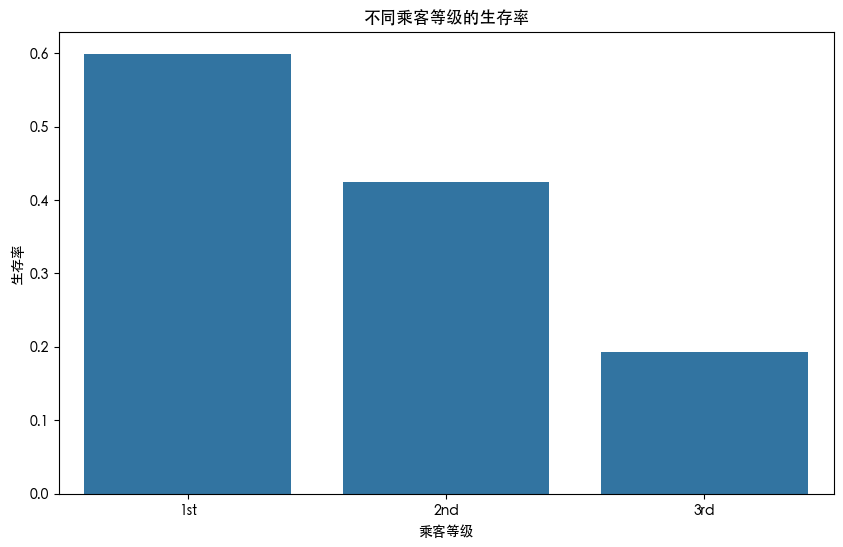


不同性别的生存率：
sex
female    0.663067
male      0.167059
Name: survived, dtype: float64


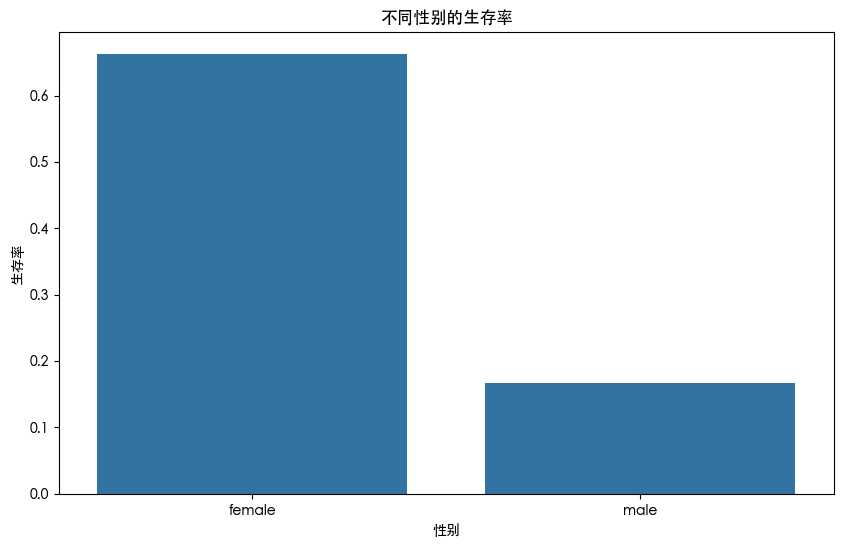


不同年龄组的生存率：
age_group
(0, 10]     0.702128
(10, 20]    0.469388
(20, 30]    0.355330
(30, 40]    0.283951
(40, 50]    0.451613
(50, 60]    0.510638
(60, 70]    0.222222
(70, 80]    0.000000
(80, 90]         NaN
Name: survived, dtype: float64


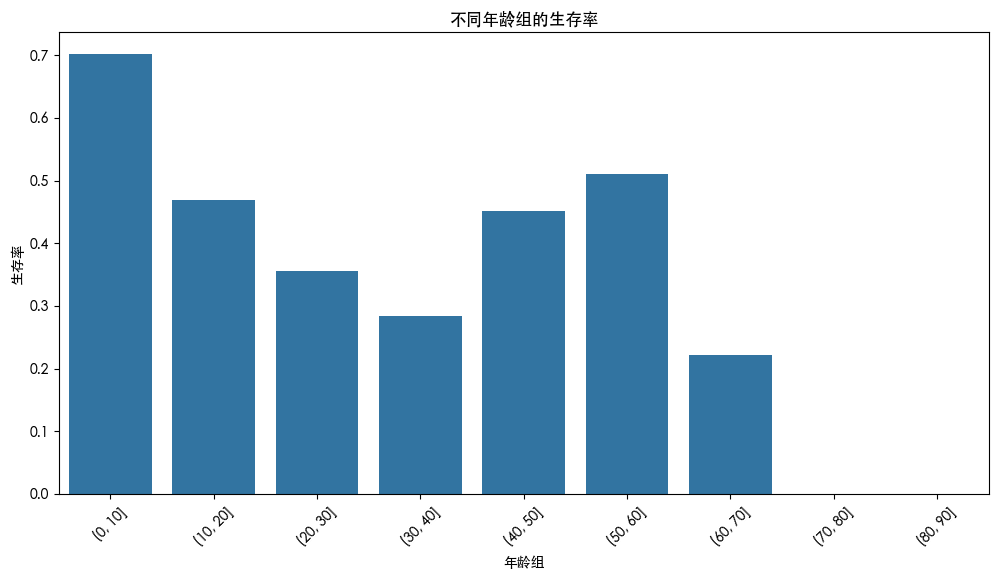


男性和女性的数量统计：
男性的数量：850，女性的数量：463


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager

# 读取泰坦尼克号数据
titanic_data = pd.read_csv('data/titanic.txt')

# 查看前几行数据
print("泰坦尼克号数据集前5行：")

font_path = ('/System/Library/Fonts/STHeiti Light.ttc')
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False
print(titanic_data.head())

# 提取需要分析的列：pclass, age, sex 和 survived
titanic_subset = titanic_data[['pclass', 'age', 'sex', 'survived']].copy()  # 使用.copy()创建真实副本而非视图

# 检查缺失值
print("\n各列缺失值数量：")
print(titanic_subset.isnull().sum())

# 处理缺失值 - 对于年龄，使用不带inplace的方法
# 修正警告：不使用链式赋值的inplace方法，直接赋值给DataFrame列
titanic_subset['age'] = titanic_subset['age'].fillna(titanic_subset['age'].mean())

# 分析乘客等级(pclass)对生存率的影响
print("\n不同乘客等级的生存率：")
pclass_survival = titanic_subset.groupby('pclass')['survived'].mean()
titanic_subset.groupby('pclass')['survived']
print('pclass_survival',pclass_survival)

plt.figure(figsize=(10, 6))
sns.barplot(x=pclass_survival.index, y=pclass_survival.values)
plt.title('不同乘客等级的生存率')
plt.xlabel('乘客等级')
plt.ylabel('生存率')
plt.show()

# 分析性别(sex)对生存率的影响
print("\n不同性别的生存率：")
sex_survival = titanic_subset.groupby('sex')['survived'].mean()
print(sex_survival)

plt.figure(figsize=(10, 6))
sns.barplot(x=sex_survival.index, y=sex_survival.values)
plt.title('不同性别的生存率')
plt.xlabel('性别')
plt.ylabel('生存率')
plt.show()

# 分析年龄(age)对生存率的影响
# 将年龄分组
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
titanic_subset['age_group'] = pd.cut(titanic_subset['age'], bins=age_bins)

print("\n不同年龄组的生存率：")
age_survival = titanic_subset.groupby('age_group',observed=False )['survived'].mean()
print(age_survival)

plt.figure(figsize=(12, 6))
sns.barplot(x=age_survival.index.astype(str), y=age_survival.values)
plt.title('不同年龄组的生存率')
plt.xlabel('年龄组')
plt.ylabel('生存率')
plt.xticks(rotation=45)
plt.show()

# # 综合分析：使用热图显示三个因素的交叉影响
# plt.figure(figsize=(15, 10))
# cross_tab = pd.crosstab([titanic_subset['pclass'], titanic_subset['sex']], 
#                         titanic_subset['age_group'], 
#                         values=titanic_subset['survived'], 
#                         aggfunc='mean')
# sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='.2f')
# plt.title('乘客等级、性别和年龄组对生存率的综合影响')
# plt.show()

# 使用决策树模型进一步分析
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
# 分析男性和女性的数量
print("\n男性和女性的数量统计：")
#value_counts():Return a Series containing counts of unique values. 
sex_counts = titanic_subset['sex'].value_counts()
print(f'男性的数量：{sex_counts["male"]}，女性的数量：{sex_counts["female"]}')




# 准备数据
# 将性别转换为数值
titanic_subset['sex'] = titanic_subset['sex'].map({'male': 0, 'female': 1})

# 删除age_group列，因为我们已经有了age列
if 'age_group' in titanic_subset.columns:
    titanic_subset = titanic_subset.drop('age_group', axis=1)

# 删除含有缺失值的行
titanic_clean = titanic_subset.dropna()

# 分离特征和目标变量



In [107]:
sex_counts = titanic_subset['sex'].value_counts()
print(sex_counts)
print(titanic_subset.head())
print(titanic_subset['sex'].head())
print(f'男性的数量：{sex_counts["male"]}，女性的数量：{sex_counts["female"]}')



# 准备数据
# 将性别转换为数值
titanic_subset['sex'] = titanic_subset['sex'].map({'male': 0, 'female': 1})

# 删除age_group列，因为我们已经有了age列
if 'age_group' in titanic_subset.columns:
    titanic_subset = titanic_subset.drop('age_group', axis=1)

# 删除含有缺失值的行
titanic_clean = titanic_subset.dropna()

sex
0    850
1    463
Name: count, dtype: int64
  pclass      age  sex  survived
0    1st  29.0000    1         1
1    1st   2.0000    1         0
2    1st  30.0000    0         0
3    1st  25.0000    1         0
4    1st   0.9167    0         1
0    1
1    1
2    0
3    1
4    0
Name: sex, dtype: int64


KeyError: 'male'

In [108]:
titanic_clean

,pclass,age,sex,survived
0,1st,29.000000,1,1
1,1st,2.000000,1,0
2,1st,30.000000,0,0
3,1st,25.000000,1,0
4,1st,0.916700,0,1
...,...,...,...,...
1308,3rd,31.194181,0,0
1309,3rd,31.194181,0,0
1310,3rd,31.194181,0,0
1311,3rd,31.194181,1,0



X_train中男性和女性的数量统计：
男性的数量：663，女性的数量：321

决策树模型准确率：0.8389

分类报告：


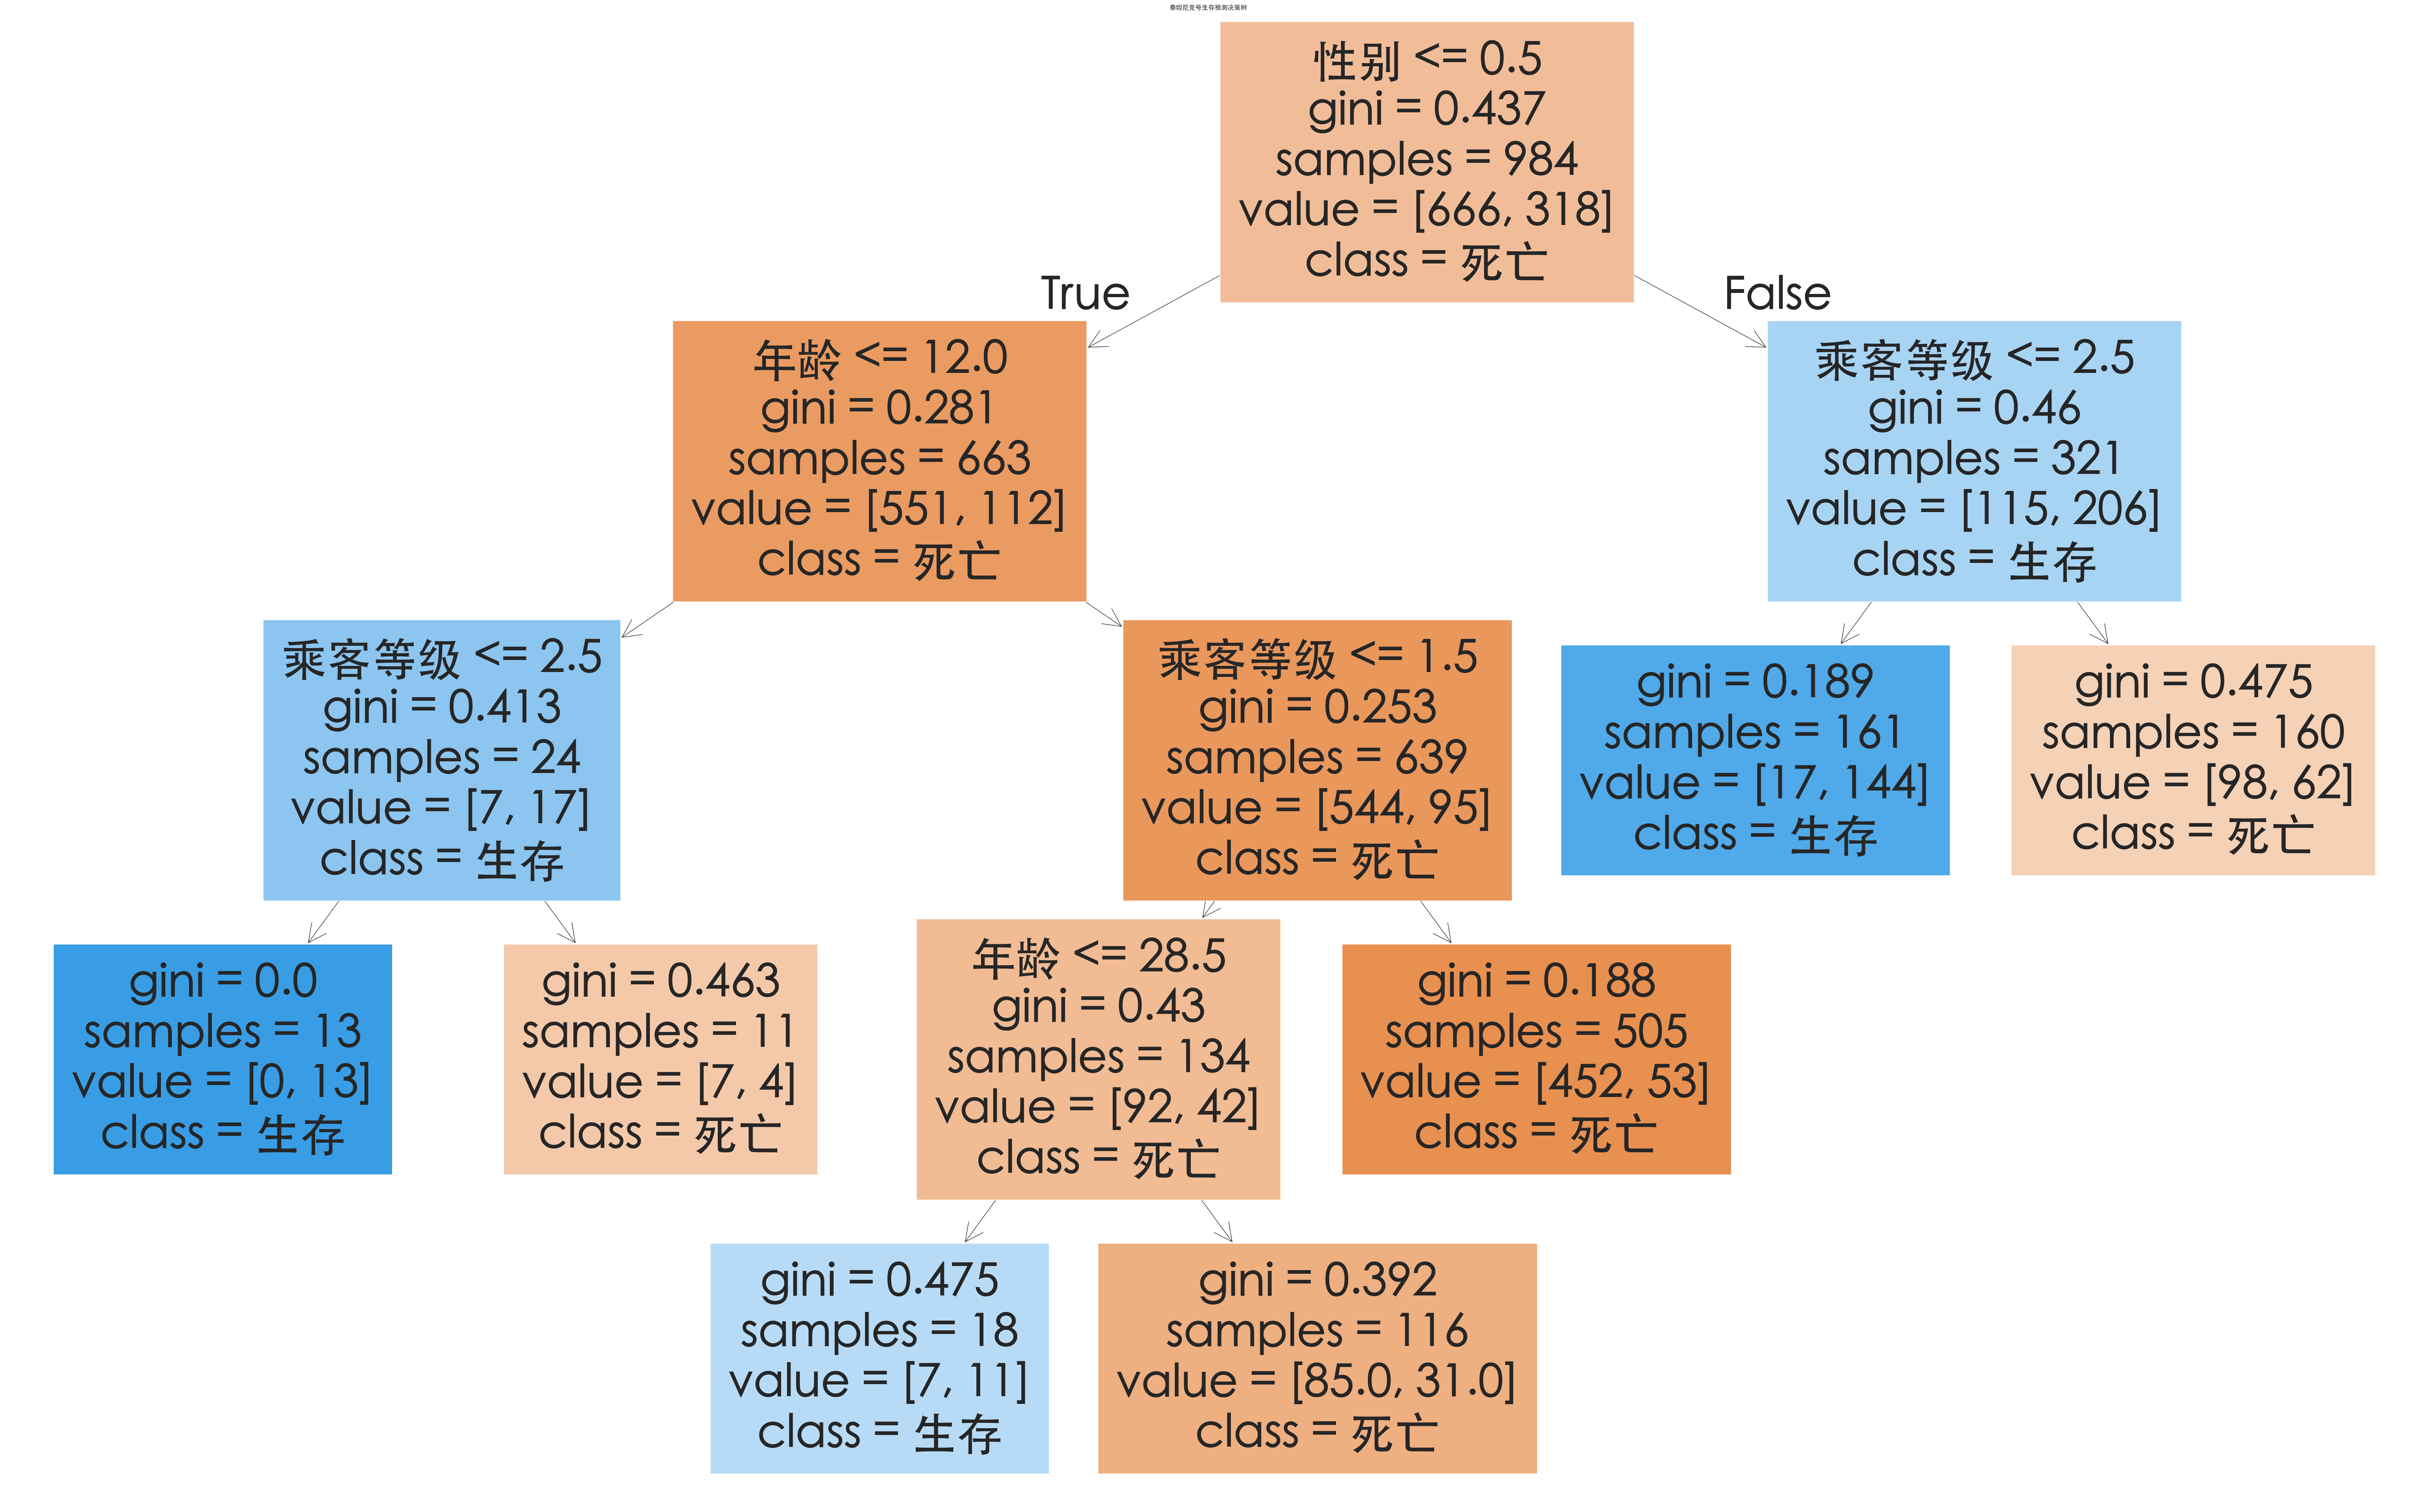


特征重要性：
       特征       重要性
2     sex  0.568333
0  pclass  0.324847
1     age  0.106820


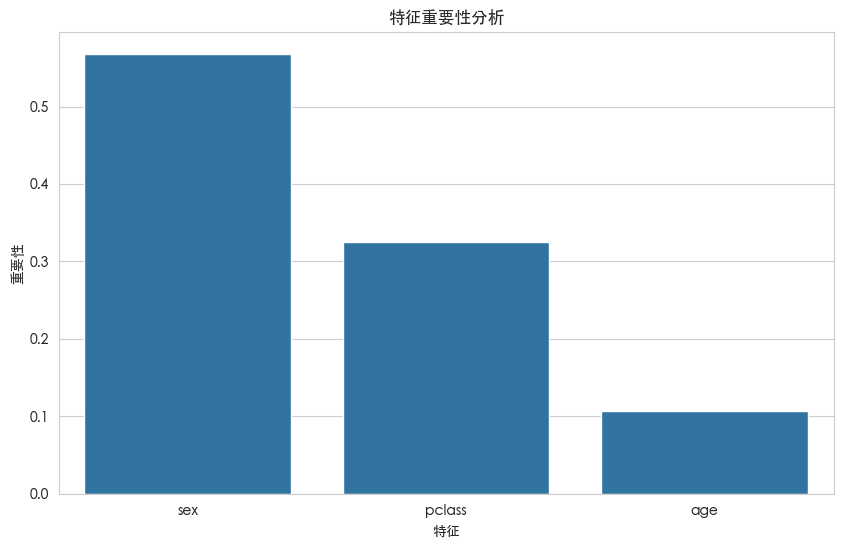


结论：
1. 乘客等级(pclass)：较高等级的乘客(如一等舱)生存率明显高于低等级
2. 性别(sex)：女性生存率显著高于男性，体现了'女士优先'的救生原则
3. 年龄(age)：儿童的生存率相对较高，而中年和老年人的生存率较低
4. 根据特征重要性分析，性别是影响生存最重要的因素，其次是乘客等级和年龄


In [115]:
# 将pclass转换为数值类型
import matplotlib.font_manager as font_manager
font_path = '/System/Library/Fonts/STHeiti Light.ttc'
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False
X = titanic_clean.copy()
X['pclass'] = X['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
X = X[['pclass', 'age', 'sex']]
y = titanic_clean['survived']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# 训练决策树模型
# min_impurity_decrease:A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
dt_model = DecisionTreeClassifier(min_impurity_decrease=0.003)
#fit():Build a decision tree classifier from the training set (X, y).
dt_model.fit(X_train, y_train)
# 统计X_train中男性和女性的数量
print("\nX_train中男性和女性的数量统计：")
sex_counts_train = X_train['sex'].value_counts()
print(f'男性的数量：{sex_counts_train[0]}，女性的数量：{sex_counts_train[1]}')

# 在测试集上评估模型
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n决策树模型准确率：{accuracy:.4f}")
print("\n分类报告：")


# 可视化决策树
plt.figure(figsize=(80, 50),dpi=120)
plot_tree(dt_model, filled=True, feature_names=['乘客等级', '年龄', '性别'], class_names=['死亡', '生存'])
plt.title('泰坦尼克号生存预测决策树')
plt.show()

# 计算特征重要性
feature_importance = pd.DataFrame({
    '特征': X.columns,
    '重要性': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('重要性', ascending=False)
print("\n特征重要性：")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='特征', y='重要性', data=feature_importance)
plt.title('特征重要性分析')
plt.show()

print("\n结论：")
print("1. 乘客等级(pclass)：较高等级的乘客(如一等舱)生存率明显高于低等级")
print("2. 性别(sex)：女性生存率显著高于男性，体现了'女士优先'的救生原则")
print("3. 年龄(age)：儿童的生存率相对较高，而中年和老年人的生存率较低")
print("4. 根据特征重要性分析，性别是影响生存最重要的因素，其次是乘客等级和年龄")

# 随机森林


随机森林模型准确率：0.8571

随机森林特征重要性：
       特征       重要性
2     sex  0.484898
0  pclass  0.298198
1     age  0.216904


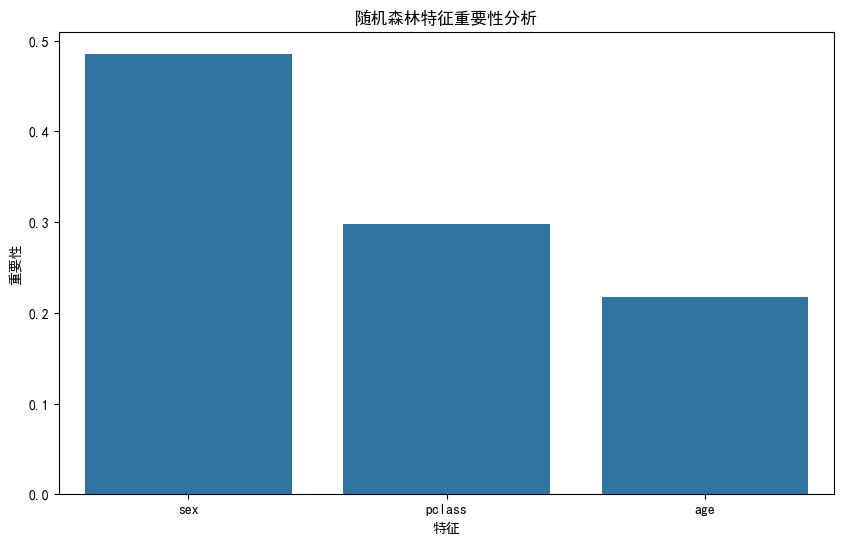


决策树与随机森林比较：
决策树准确率：0.8389
随机森林准确率：0.8571
准确率提升：1.82%


In [50]:
# 导入随机森林分类器
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 创建随机森林模型
# n_estimators:The number of trees in the forest.
# random_state:Controls the randomness of the estimator.
# max_depth:The maximum depth of the tree.
#bootstrap – Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
rf_model = RandomForestClassifier(n_estimators=500, random_state=42,bootstrap=True,max_depth=3)

# 训练模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
rf_pred = rf_model.predict(X_test)

# 评估模型
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"\n随机森林模型准确率：{rf_accuracy:.4f}")




# 计算随机森林的特征重要性
rf_feature_importance = pd.DataFrame({
    '特征': X.columns,
    '重要性': rf_model.feature_importances_
})
rf_feature_importance = rf_feature_importance.sort_values('重要性', ascending=False)
print("\n随机森林特征重要性：")
print(rf_feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='特征', y='重要性', data=rf_feature_importance)
plt.title('随机森林特征重要性分析')
plt.show()

# 比较决策树和随机森林
print("\n决策树与随机森林比较：")
print(f"决策树准确率：{accuracy:.4f}")
print(f"随机森林准确率：{rf_accuracy:.4f}")
print(f"准确率提升：{(rf_accuracy-accuracy)*100:.2f}%")


Fitting 7 folds for each of 25 candidates, totalling 175 fits

最佳超参数组合: {'max_depth': 2, 'n_estimators': 300}
最佳交叉验证得分: 0.8150
最佳随机森林模型在测试集上的准确率: 0.8511

优化前随机森林准确率: 0.8571
优化后随机森林准确率: 0.8511
准确率提升: -0.61%


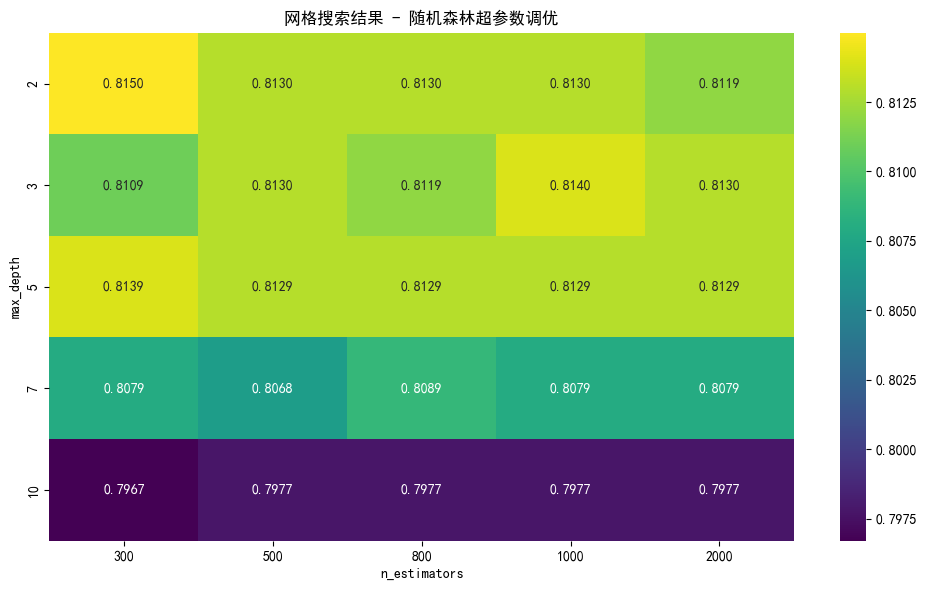

In [55]:
# 使用网格搜索为随机森林寻找最优超参数
from sklearn.model_selection import GridSearchCV

# 定义要搜索的超参数网格
param_grid = {
    'n_estimators': [ 300, 500, 800,1000,2000],
    'max_depth': [2,3, 5, 7, 10]
}

# 创建随机森林模型
rf = RandomForestClassifier(random_state=1)

# 创建网格搜索对象,verbose=1表示打印详细信息
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=7,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 在训练数据上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"\n最佳超参数组合: {grid_search.best_params_}")
print(f"最佳交叉验证得分: {grid_search.best_score_:.4f}")

# 使用最佳参数创建随机森林模型
best_rf_model = grid_search.best_estimator_

# 在测试集上评估最佳模型
best_rf_pred = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f"最佳随机森林模型在测试集上的准确率: {best_rf_accuracy:.4f}")

# 比较原始随机森林和调优后的随机森林
print(f"\n优化前随机森林准确率: {rf_accuracy:.4f}")
print(f"优化后随机森林准确率: {best_rf_accuracy:.4f}")
print(f"准确率提升: {(best_rf_accuracy-rf_accuracy)*100:.2f}%")

# 可视化网格搜索结果
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot_table(
    values='mean_test_score', 
    index='param_max_depth', 
    columns='param_n_estimators'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.4f')
plt.title('网格搜索结果 - 随机森林超参数调优')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.tight_layout()
plt.show()
